In [1]:
import pandas as pd
from pandas_datareader import data

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bb = data.DataReader("BBRY", data_source="google", start="2007-07-01", 
                     end="2008-12-31")
bb.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2007-07-02,201.97,215.40,199.07,214.26,18888168
2007-07-03,215.48,216.89,206.40,207.94,8835540
2007-07-05,216.46,217.30,209.01,216.19,13251409


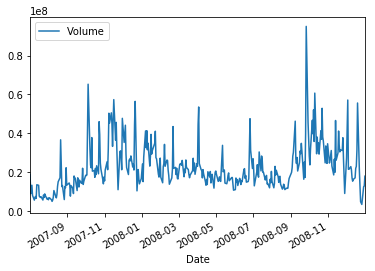

In [6]:
bb.plot(y="Volume")

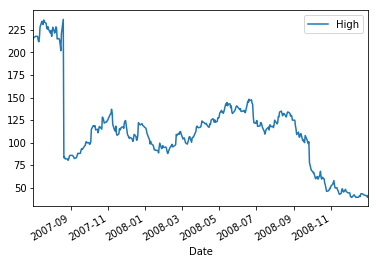

In [7]:
bb.plot(y="High")

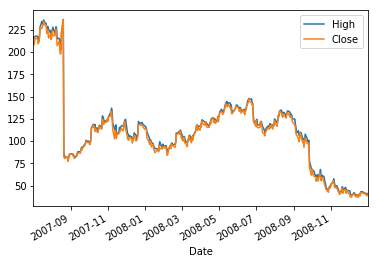

In [8]:
bb.plot(y=["High", "Close"])

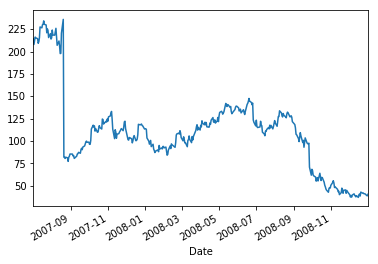

In [9]:
bb["Close"].plot()

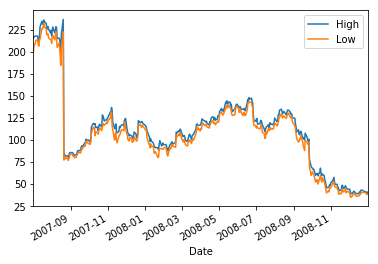

In [11]:
bb[["High", "Low"]].plot()

# Modifying Aesthetics

In [12]:
plt.style.available

['seaborn-dark-palette',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'seaborn-deep',
 'ggplot',
 'seaborn-bright',
 'seaborn-muted',
 '_classic_test',
 'classic',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-dark',
 'seaborn-poster',
 'seaborn-ticks',
 'dark_background',
 'grayscale',
 'seaborn',
 'seaborn-talk',
 'seaborn-paper',
 'bmh',
 'seaborn-pastel',
 'seaborn-white',
 'seaborn-colorblind']

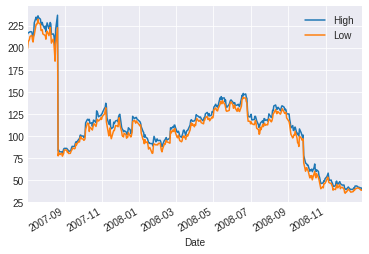

In [17]:
plt.style.use("seaborn-darkgrid")
bb[["High", "Low"]].plot()

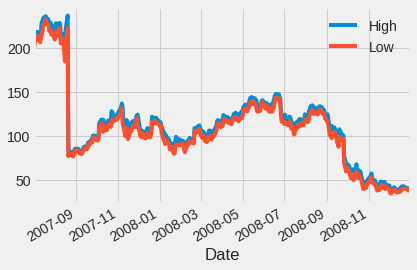

In [18]:
plt.style.use("fivethirtyeight")
bb[["High", "Low"]].plot()

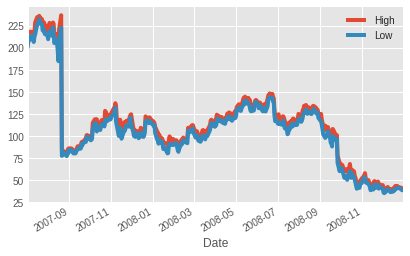

In [19]:
plt.style.use("ggplot")
bb[["High", "Low"]].plot()

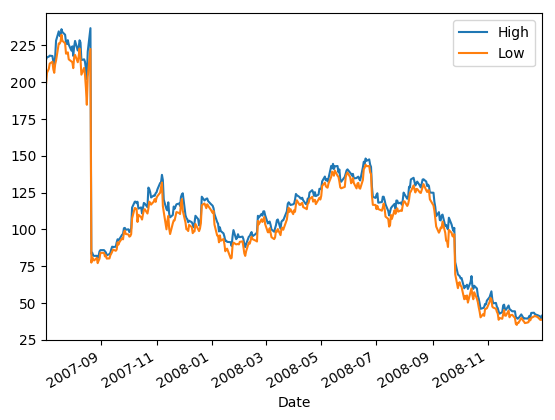

In [23]:
plt.style.use("default")
bb[["High", "Low"]].plot()

# Bar Charts

In [24]:
google = data.DataReader("GOOG", data_source="google", start="2004-01-01", 
                         end="2016-12-31")
google.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN
2004-08-20,50.69,54.49,50.20,54.10,NaN
2004-08-23,55.32,56.68,54.47,54.65,NaN


In [25]:
plt.style.use("ggplot")

In [26]:
def rank(stock_price):
    if stock_price <= 200:
        return "Poor"
    elif stock_price > 200 and stock_price <= 300:
        return "Satisfactory"
    else:
        return "Stellar"

In [28]:
google["Rank"] = google["Close"].apply(rank)

In [29]:
google.head(3)

,Open,High,Low,Close,Volume,Rank
Date,,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN,Poor
2004-08-20,50.69,54.49,50.20,54.10,NaN,Poor
2004-08-23,55.32,56.68,54.47,54.65,NaN,Poor


In [30]:
google["Rank"].value_counts()

Stellar         1393
Satisfactory    1128
Poor             593
Name: Rank, dtype: int64

In [33]:
ranks_s = google["Rank"].value_counts()

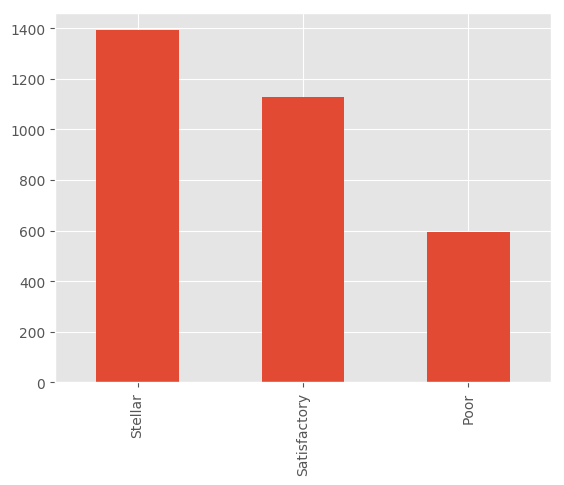

In [34]:
ranks_s.plot(kind="bar")

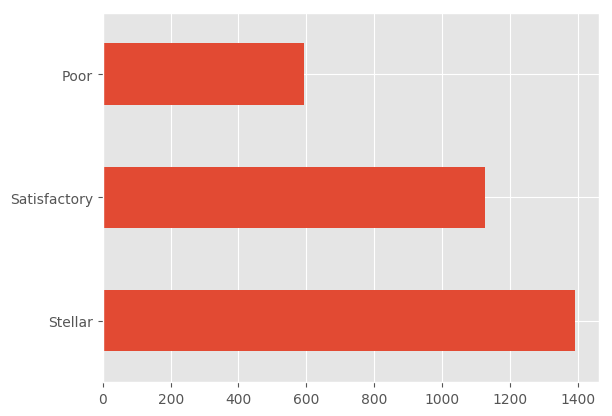

In [35]:
ranks_s.plot(kind="barh")

# Pie Charts

In [36]:
apple = data.DataReader("AAPL", data_source="google", start="2012-01-01", 
                        end="2016-12-31")
apple.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,58.49,58.93,58.43,58.75,75564699
2012-01-04,58.57,59.24,58.47,59.06,65061108
2012-01-05,59.28,59.79,58.95,59.72,67816805


In [37]:
apple["Close"].mean()

93.36167726550082

In [38]:
avg = 93.36167726550082
def rank_apple(p):
    if p > avg:
        return "Above Average"
    return "Below Average"

In [39]:
s = apple["Close"].apply(rank_apple).value_counts()

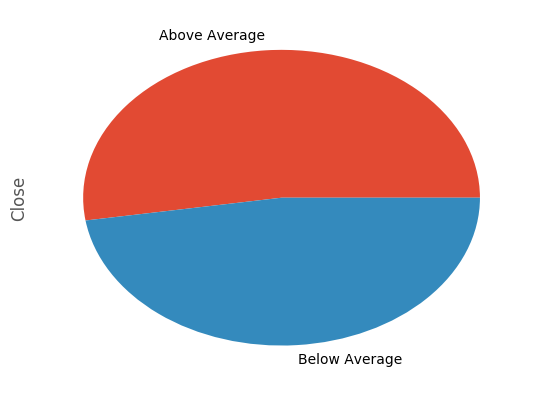

In [41]:
s.plot(kind="pie")

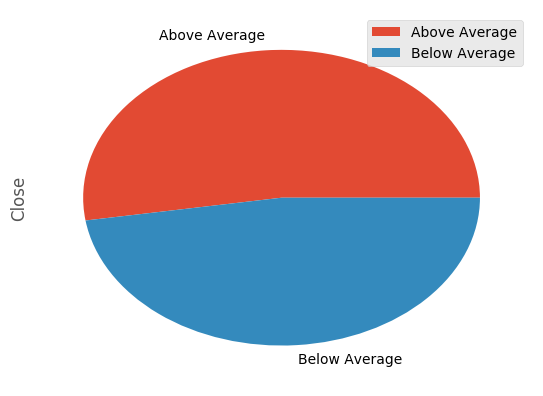

In [42]:
s.plot(kind="pie", legend=True)

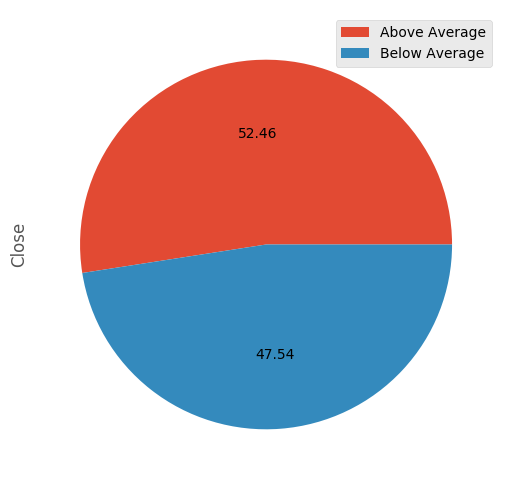

In [46]:
s.plot(kind="pie", legend=True, figsize=(6,6), 
       autopct='%.2f', labels=None)

# Histograms

In [47]:
google.head(3)

,Open,High,Low,Close,Volume,Rank
Date,,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN,Poor
2004-08-20,50.69,54.49,50.20,54.10,NaN,Poor
2004-08-23,55.32,56.68,54.47,54.65,NaN,Poor


In [49]:
def custom_round(p):
    return int(p / 100.0) * 100

In [52]:
bkts = google["High"].apply(custom_round).value_counts()

In [54]:
bkts.sort_index(inplace=True)
bkts

0       157
100     414
200    1129
300     449
400     159
500     414
600     107
700     273
800      12
Name: High, dtype: int64

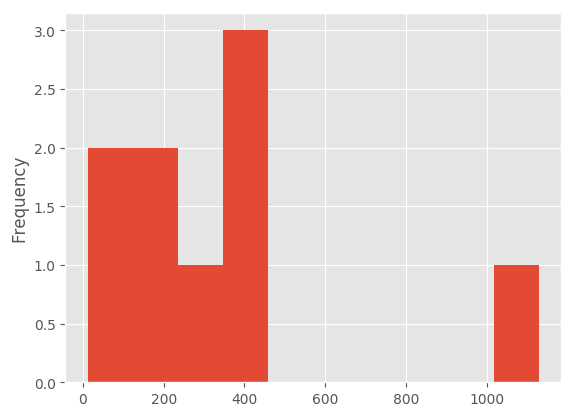

In [59]:
plt.figure();
bkts.plot.hist() # This shit is weird